In [5]:
# Importálások
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import seaborn as sns

In [6]:
# Adat beolvasása
file = pd.read_csv('adatszet_A_csoport.csv')

# Felbontás a feature-ökre és labelekre
# Lehet ezt más módszerrel is, mint loc vagy egyebek tbf
X = file.iloc[:, :10]
Y = file.iloc[:, 10]

In [7]:
# Teszt, hogy jó-e
print(X.head())
print(Y.head())

   # feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     0.957386   3.443675   0.999304  -0.343926  -4.635435   0.766966   
1    -0.109939  -0.865697  -0.464845  -2.886531  -0.833199   1.488993   
2     2.289896   0.075200  -1.014486  -2.073310   0.082538   1.277590   
3     0.661149   0.752222  -1.267845  -0.735257  -1.085805  -0.726873   
4    -1.494475  -0.137208  -2.452925   0.574565  -1.217830   2.450139   

   feature_6  feature_7  feature_8  feature_9  
0   1.120216   1.140696   0.650563   0.324875  
1  -0.571916   1.900266  -1.094809   0.488987  
2  -1.296597   0.754540  -3.187318   2.602639  
3  -1.633767   1.364671  -1.689582  -0.441893  
4   6.600742  -3.217090   1.231812  -0.330446  
0    0.0
1    3.0
2    3.0
3    0.0
4    2.0
Name: label, dtype: float64


In [8]:
# Mivel a Y dataframe-nek float típusa van ezért átalakítom int-re, hogy ne legyen rinya ha lenne.
Y = Y.apply(np.int64)
Y.dtypes

dtype('int64')

In [9]:
# Adathalmaz felosztása 80-20-ra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

accuracy_score: 0.9
K. szomszédok: [0.905, 0.9, 0.905, 0.9, 0.905, 0.91, 0.9, 0.885, 0.9, 0.89, 0.88, 0.875, 0.885, 0.88, 0.875, 0.87, 0.86, 0.865, 0.86, 0.855, 0.86, 0.865, 0.86, 0.855, 0.865]


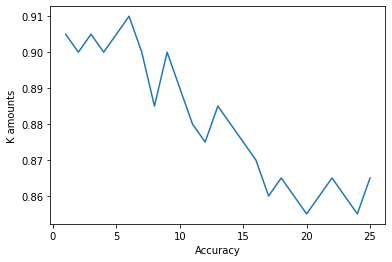

In [61]:
# KNN feltanítása
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

# KNN tesztelése
Y_pred = knn.predict(X_test)
print("accuracy_score:",accuracy_score(Y_test, Y_pred))

# Lefuttatjuk a KNN modellt 1-től 26 szomszédig,
# hogy megtaláljuk a legjobb szomszédszámot.
scores = []

for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))

print('K. szomszédok:',scores)

# Eredmény plottolása. Ez azért kell, hogy a legjobb szomszédszámot megkeressük
plt.plot(range(1,26), scores)
plt.xlabel('Accuracy')
plt.ylabel('K amounts')
plt.show()

In [31]:
# LOGISZTIKUS REGRESSZIÓ TANÍTÁS ÉS HIPERPARAMÉTER OPTIMALIZÁLÁS

# Kernel: Átalakítja az adathalmazt, hogy tudjon vonalat tenni, 
        # amivel majd szétválaszthatjuk az adathalmazt több részre.
        # A lineáris kernel van a képeken, pl a margós képen      
# Reguralization: Ezzel határozzuk meg, hogy mennyire durván büntessünk grr~
# Gamma: Alacsonyabb gamma érték inkább alultanít, magasabb meg túltanit. Arany középút
# Hiperparaméterek meghatározása. Több adattal dolgozunk, hogy majd a legjobb kombót megkapjuk
param_grid = {'C': [0.1, 1, 10, 100, 1000],
'tol': [0.01, 0.001, 0.0001, 0.00001],
'solver': ['lbfgs', 'newton-cg']}
# GridSearchCV a param_grid-ben a kernel, gamma, C sorok összes kombinációját lefuttatja
# verbose: 1 -> számítási időt kiírja, 2 -> idő + pontosság, 3 -> idő + pontosság + paraméter indexek stb.
grid = GridSearchCV(LogisticRegression(), param_grid, verbose=1)
grid.fit(X_train, Y_train)
# Legjobb paraméter kiírása
print('Legjobb paraméter:',grid.best_params_)

# Legjobb paraméterrel dolgozás
grid_predictions = LogisticRegression(solver='lbfgs', C=10, tol=0.01)
grid_predictions.fit(X_train, Y_train)
Y_pred = grid_predictions.predict(X_test)
print('Predictek:', Y_pred)

# Különböző pontosságok
print('Pontosság accuracy_score', accuracy_score(Y_test, Y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Legjobb paraméter: {'C': 10, 'solver': 'lbfgs', 'tol': 0.01}
Predictek: [1 1 2 3 3 1 1 2 1 1 0 0 0 3 2 2 0 1 1 2 1 3 2 1 2 2 3 3 3 3 2 2 3 0 3 1 2
 0 0 0 2 2 0 3 0 2 2 2 0 2 0 1 1 0 1 1 3 0 0 3 0 1 2 0 1 1 1 3 0 2 2 0 2 0
 3 2 1 2 0 2 1 1 1 0 2 2 1 3 0 0 3 2 2 0 3 1 2 3 2 2 0 0 2 1 0 1 3 0 0 2 2
 1 3 2 2 0 2 3 0 0 1 2 1 1 2 1 2 2 0 0 1 1 0 0 2 1 1 0 2 0 3 1 3 1 3 2 1 1
 0 0 0 0 0 0 0 3 3 1 3 3 3 3 2 2 2 1 3 3 2 2 0 2 3 0 3 1 3 3 3 0 3 2 3 1 3
 3 2 3 3 3 0 0 3 3 2 2 0 1 0 0]
Pontosság accuracy_score 0.81


In [37]:
# RANDOM FOREST TANÍTÁS ÉS HIPERPARAMÉTER OPTIMALIZÁLÁS

# Kernel: Átalakítja az adathalmazt, hogy tudjon vonalat tenni, 
        # amivel majd szétválaszthatjuk az adathalmazt több részre.
        # A lineáris kernel van a képeken, pl a margós képen      
# Reguralization: Ezzel határozzuk meg, hogy mennyire durván büntessünk grr~
# Gamma: Alacsonyabb gamma érték inkább alultanít, magasabb meg túltanit. Arany középút
# Hiperparaméterek meghatározása. Több adattal dolgozunk, hogy majd a legjobb kombót megkapjuk
param_grid = {'n_estimators': [25, 50, 100, 150, 200],
'criterion': ['gini', 'entropy']}
# GridSearchCV a param_grid-ben a kernel, gamma, C sorok összes kombinációját lefuttatja
# verbose: 1 -> számítási időt kiírja, 2 -> idő + pontosság, 3 -> idő + pontosság + paraméter indexek stb.
grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=1)
grid.fit(X_train, Y_train)
# Legjobb paraméter kiírása
print('Legjobb paraméter:',grid.best_params_)

# Legjobb paraméterrel dolgozás
grid_predictions = RandomForestClassifier(n_estimators=150, criterion='entropy')
grid_predictions.fit(X_train, Y_train)
Y_pred = grid_predictions.predict(X_test)
print('Predictek:', Y_pred)

# Különböző pontosságok
print('Pontosság accuracy_score', accuracy_score(Y_test, Y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Legjobb paraméter: {'criterion': 'entropy', 'n_estimators': 100}
Predictek: [1 0 2 3 3 1 1 2 1 1 0 0 0 0 2 2 0 1 0 2 1 3 2 1 2 2 0 3 3 0 2 2 0 0 2 1 2
 0 0 0 2 2 2 3 1 2 2 2 0 2 1 1 0 2 1 1 3 1 0 3 0 1 2 1 0 1 2 3 3 2 2 0 2 0
 3 2 1 2 0 2 0 0 1 3 2 2 1 0 0 0 3 2 2 0 3 0 2 3 2 2 0 0 2 1 1 1 3 0 0 2 2
 1 0 3 2 1 2 3 0 1 1 2 1 1 2 1 2 2 1 0 1 1 0 1 2 1 1 0 0 0 3 1 3 1 3 2 1 1
 0 0 0 0 0 0 0 3 3 1 3 3 3 3 2 2 2 1 3 1 2 2 0 2 3 0 3 1 0 3 3 2 3 2 3 1 3
 3 2 3 3 3 0 0 3 3 2 2 3 1 0 0]
Pontosság accuracy_score 0.915


In [46]:
# Szavazás alapú Ensemble használata (VotingClassifier)
# Lehetne itt olyant is csinálni, hogy a korábban létrehozott modelleket tesszük be ide,
# sőt ezt is kéri elv a feladat, de csak át copyztam a jegyzetemből és ott meg itt helyben
# vannak itt létrehozva.

# Ebben tároljuk a különböző modelleket. 
estimators = []
# Logisztikus regresszió: solver: {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'
model1 = LogisticRegression(solver='lbfgs', C=10, tol=0.01, random_state=69)
# Tuple formátumban kell feltölteni a tömböt, mert így jó csak a VotingClassifier ('logistic', model1)
estimators.append(('logistic', model1))
# KNN feltöltése: model2
model2 = KNeighborsClassifier(n_neighbors=7)
# Tuple formátumban kell feltölteni a tömböt ('knn', model2)
estimators.append(('knn', model2))
# Random Forest feltöltése: model3
model3 = RandomForestClassifier(n_estimators=150, criterion='entropy')
# Tuple formátumban kell feltölteni a tömböt ('rfc', model3)
estimators.append(('rfc', model3))

# A VotingClassifier-be kell bele tenni a tuple formátumokat 
ensembleVC = VotingClassifier(estimators=estimators) # Csak tuple formátumot fogad el
results = cross_val_score(ensembleVC, X, Y, cv=10)
print('Pontosság cross_val:',results.mean())
# Tradicionális
ensembleVC.fit(X_train, Y_train)
print('Pontosság score:',ensembleVC.score(X_test, Y_test))


Pontosság cross_val: 0.914
Pontosság score: 0.915


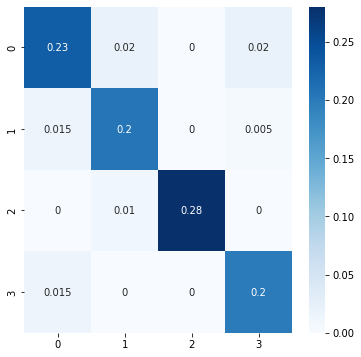

In [59]:
# Ensemble model prediktálás
Y_pred = ensembleVC.predict(X_test)

# Konfúziós mátrix kiírása
# A normalize='all' annyit csinál, hogy a prediktálásokat arányosan írja ki,
# ergó ha az összes cellában lévő értékek összege 1 lesz.
cf_matrix = confusion_matrix(Y_test, Y_pred, normalize='all')
plt.figure(figsize=(6,6))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

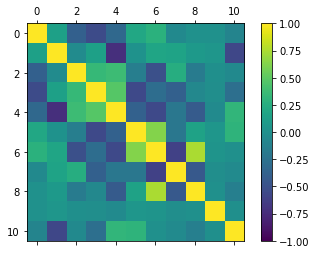

In [55]:
# Korrelációk keresése
# Ez egy korrelációs mátrix (Pearson's Correlation), amin észrevehető,
# hogy az adathalmazunk szimmetrikus és valamely adatok
# negatívan korrelállnak egymással (-1-hez közelít), néhány pozitívan (1-hez közelít)
# de a nagyjuk nagyon enyhe korrelációt mutat ki. (0-hoz közeliek)
# https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_correlation_matrix_plot.htm
correlations = file.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
plt.show()